**Importing data**

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/apple-quality/apple_quality.csv


In [2]:
data = pd.read_csv("/kaggle/input/apple-quality/apple_quality.csv")

data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [3]:
data.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [5]:
data.isna().sum() #checking null values in data

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [6]:
data=data.dropna() #drop null values from data
data.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
A_id,4000.0,1999.500000,1154.844867,0.000000,999.750000,1999.500000,2999.250000,3999.000000
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837


In [8]:
data.duplicated().sum()

0

In [9]:
data = data.drop('A_id', axis=1) #drop unnecessary column

data.head(3)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad


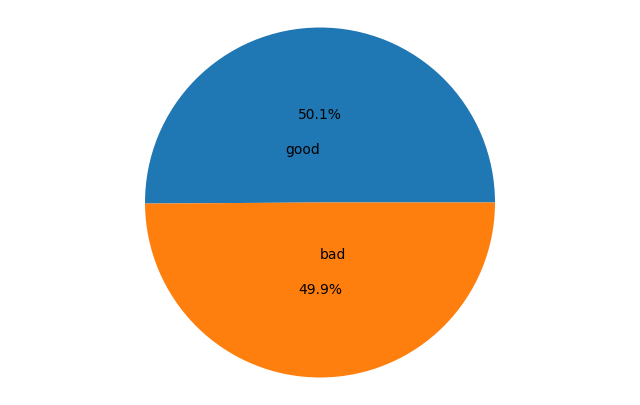

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

value_counts = data["Quality"].value_counts()
fig = plt.figure(figsize=(8,5))

plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', pctdistance=0.5, labeldistance=.3)
plt.axis('equal')  
plt.show()

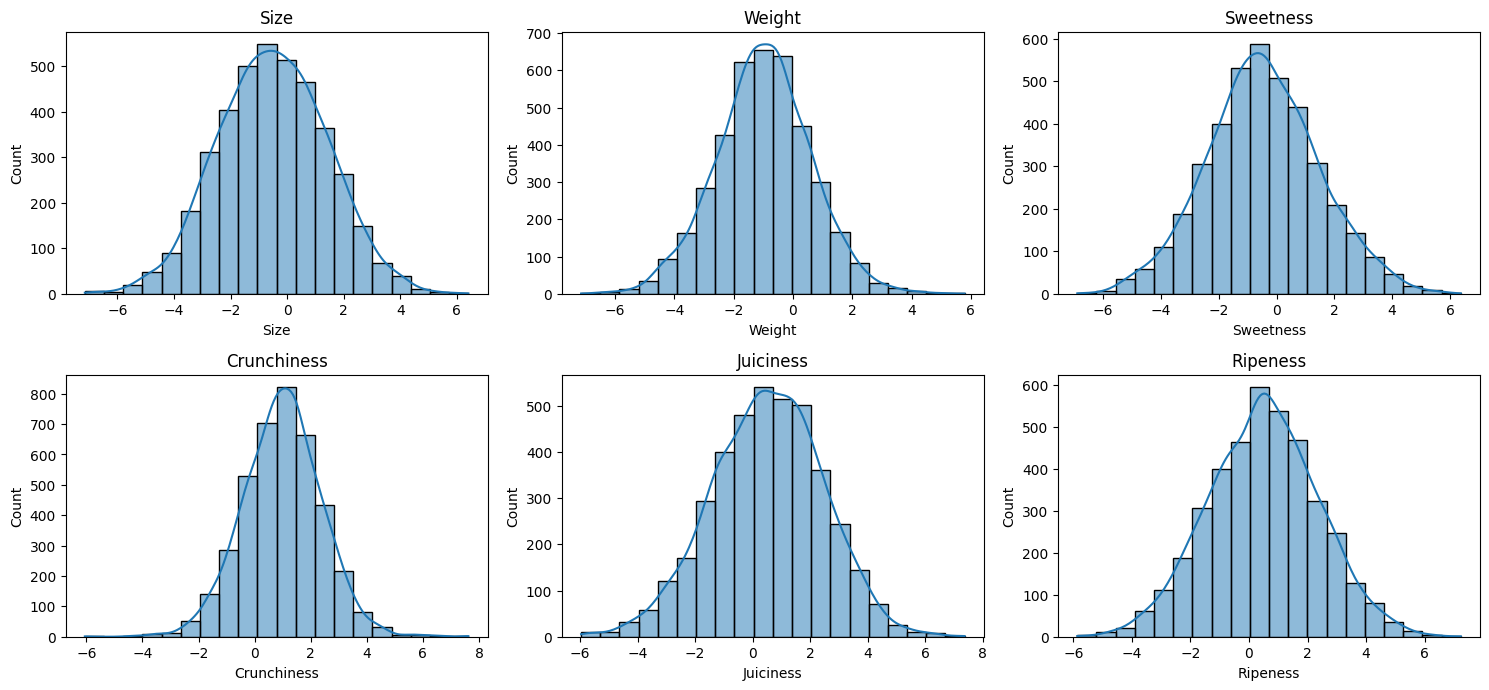

In [11]:
import warnings
warnings.filterwarnings("ignore")

numerical_columns = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness']

plt.figure(figsize=(15,10))
sns.set_palette('tab10')

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data, x=column, kde=True, bins=20)  
    plt.title(column)

plt.tight_layout()
plt.show()

From these graphs we can see that all numeric data are normally distributed, so it would be better to use StandardScaler here.

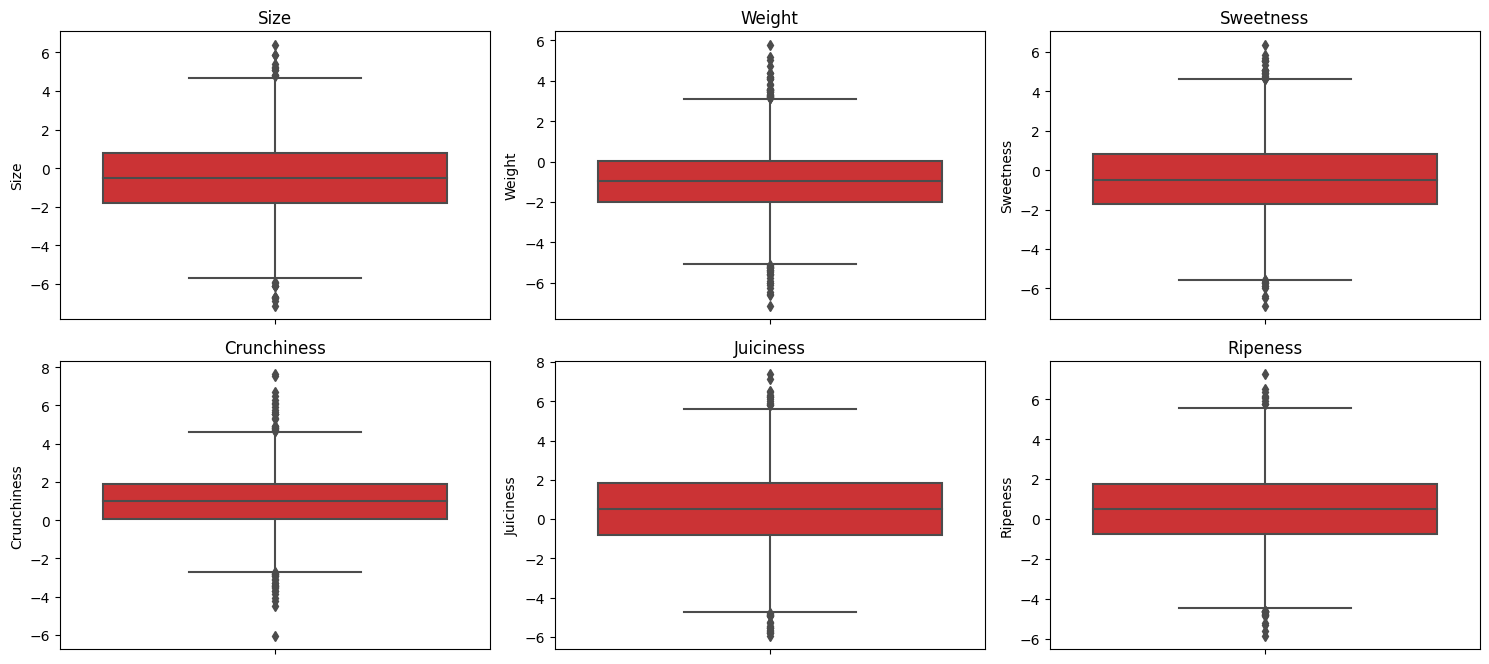

In [12]:
numerical_columns = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness']

plt.figure(figsize=(15, 10))
sns.set_palette("Set1")
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

**PreProcessing**

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [14]:
encoder = LabelEncoder()

data['Quality'] = encoder.fit_transform(data['Quality'])

data.head(3)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837
Quality,4000.0,0.501000,0.500062,0.000000,0.000000,1.000000,1.000000,1.000000


In [16]:
x = data[data.columns[:-1]] #Feature Variables
y = data['Quality'] #Target Variable

In [17]:
x.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036


In [18]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Quality, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

standard_scaler = StandardScaler()

X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.fit_transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression

lgstc_clf = LogisticRegression(random_state=42)

lgstc_clf.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

Accuracy: 0.75875
Classification Report:               precision    recall  f1-score   support

           0       0.77      0.75      0.76       401
           1       0.75      0.77      0.76       399

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800



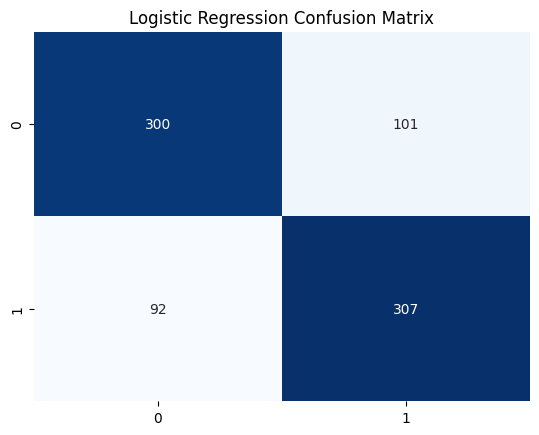

In [21]:
y_pred = lgstc_clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:", classification_rep)
sns.heatmap(conf_matrix,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Logistic Regression Confusion Matrix');

Here we see the accuracy of this model is 0.75875, and Confusion Matrix values are not very well. Then I try to train model with K-Nearest Neighbors for better accuracy and Confusion Matrix.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

Accuracy =  89.12  %
Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       401
           1       0.88      0.90      0.89       399

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800




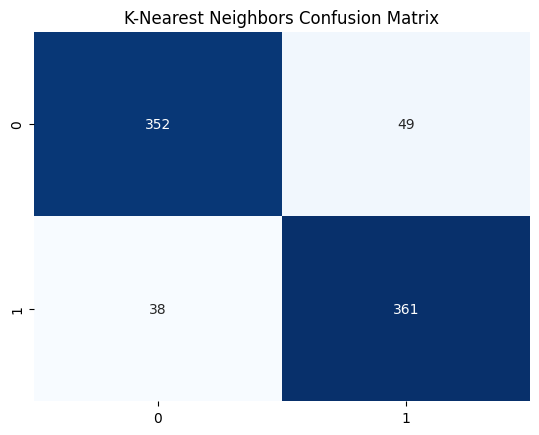

In [23]:
y_pred = knn.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
knn_train_acc = round(accuracy_score(y_train,knn.predict(X_train_scaled))*100,2)
knn_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , knn_test_acc,' %')
print("Classification report: \n{}\n".format(classification_report(y_test, y_pred)))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('K-Nearest Neighbors Confusion Matrix');

If you like my notebook, please upvote for my motivation. 😊